# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [3]:
X = df[['am', 'pm']]
y = df['target']

clf = LogisticRegression(random_state=21, fit_intercept=False)
clf.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [4]:
a0 = clf.intercept_[0]
a1 = clf.coef_[0][0]
a2 = clf.coef_[0][1]
am_min, am_max = df['am'].min(), df['am'].max()
am_line = np.array([am_min, am_max])
pm_line = (-a0 - a1 * am_line) / a2

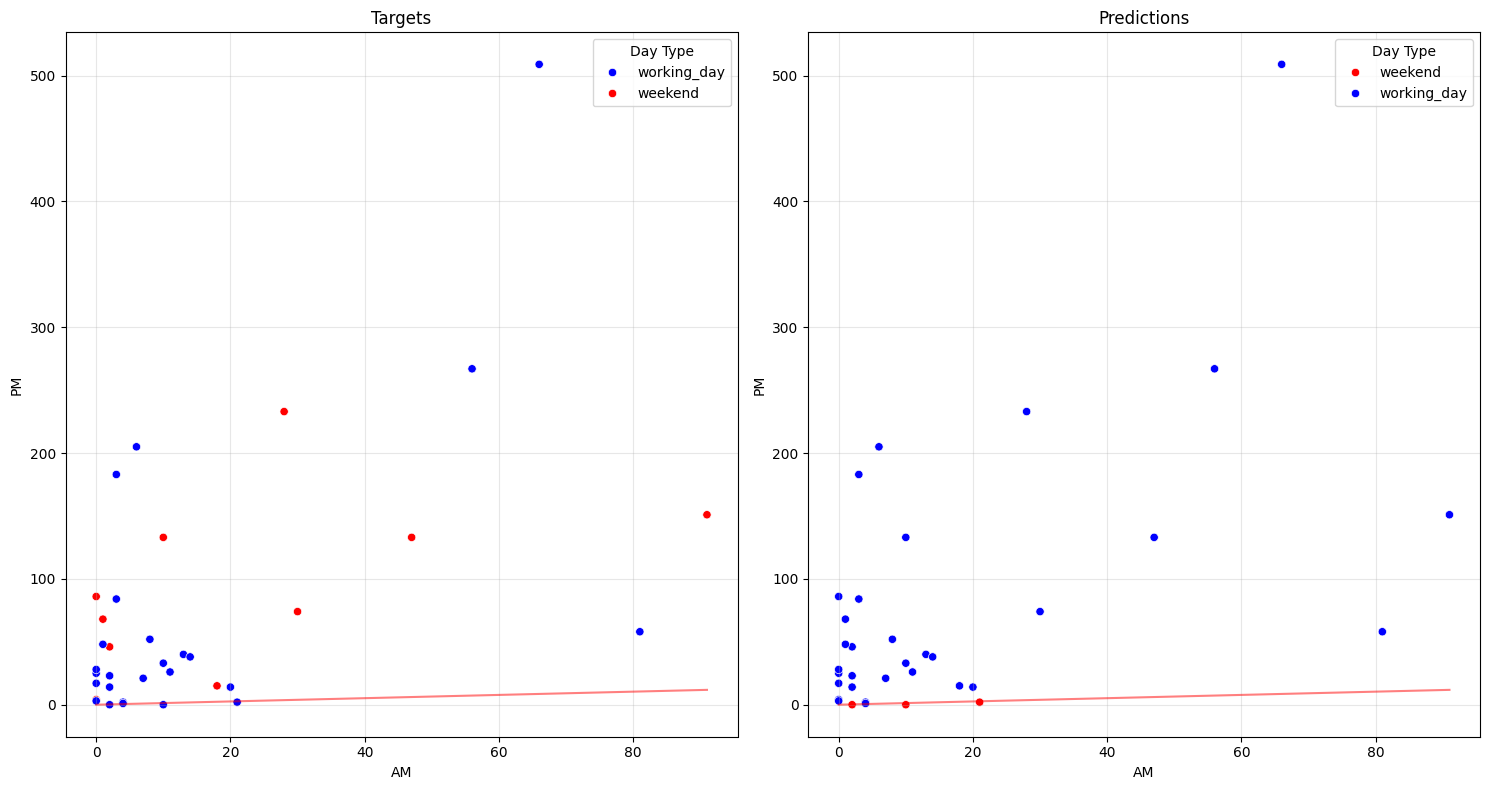

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.scatterplot(data=df, x='am', y='pm', hue='target',
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax1)
ax1.plot(am_line, pm_line, color='red', alpha=0.5)
ax1.set_xlabel('AM')
ax1.set_ylabel('PM')
ax1.set_title('Targets')
ax1.legend(title='Day Type')
ax1.grid(True, alpha=0.3)

sns.scatterplot(data=df, x='am', y='pm', hue='predict',
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax2)
ax2.plot(am_line, pm_line, color='red', alpha=0.5)
ax2.set_xlabel('AM')
ax2.set_ylabel('PM')
ax2.set_title('Predictions')
ax2.legend(title='Day Type')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X.head())
display(X_scaled[:10])

,am,pm
0,21,2
1,1,68
2,18,15
3,2,23
4,0,25


array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202]])

In [7]:
clf = LogisticRegression(random_state=21, fit_intercept=False)
clf.fit(X_scaled, y)

y_pred = clf.predict(X_scaled)
y_pred[:10]

array(['working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'weekend'], dtype=object)

Выведем точность после стандартизации данных

In [8]:
accuracy = accuracy_score(y, y_pred)
accuracy

0.7428571428571429

Точность наивного классификатора:

In [9]:
most_common_class = y.mode()[0]
naive_accuracy = (y == most_common_class).mean()
float(naive_accuracy)

0.7142857142857143

Did it get better than a naive classifier with the most popular class? yess))

In [10]:
am_min, am_max = X_scaled[:, 0].min(), X_scaled[:, 0].max()
pm_min, pm_max = X_scaled[:, 1].min(), X_scaled[:, 1].max()

am_values = np.linspace(am_min - 0.5, am_max + 0.5, 100)
pm_values = np.linspace(pm_min - 0.5, pm_max + 0.5, 100)
xx, yy = np.meshgrid(am_values, pm_values)
grid = np.c_[xx.ravel(), yy.ravel()]

probs = clf.predict_proba(grid)
probs_weekend = probs[:, 1]
probs_weekend = probs_weekend.reshape(xx.shape)

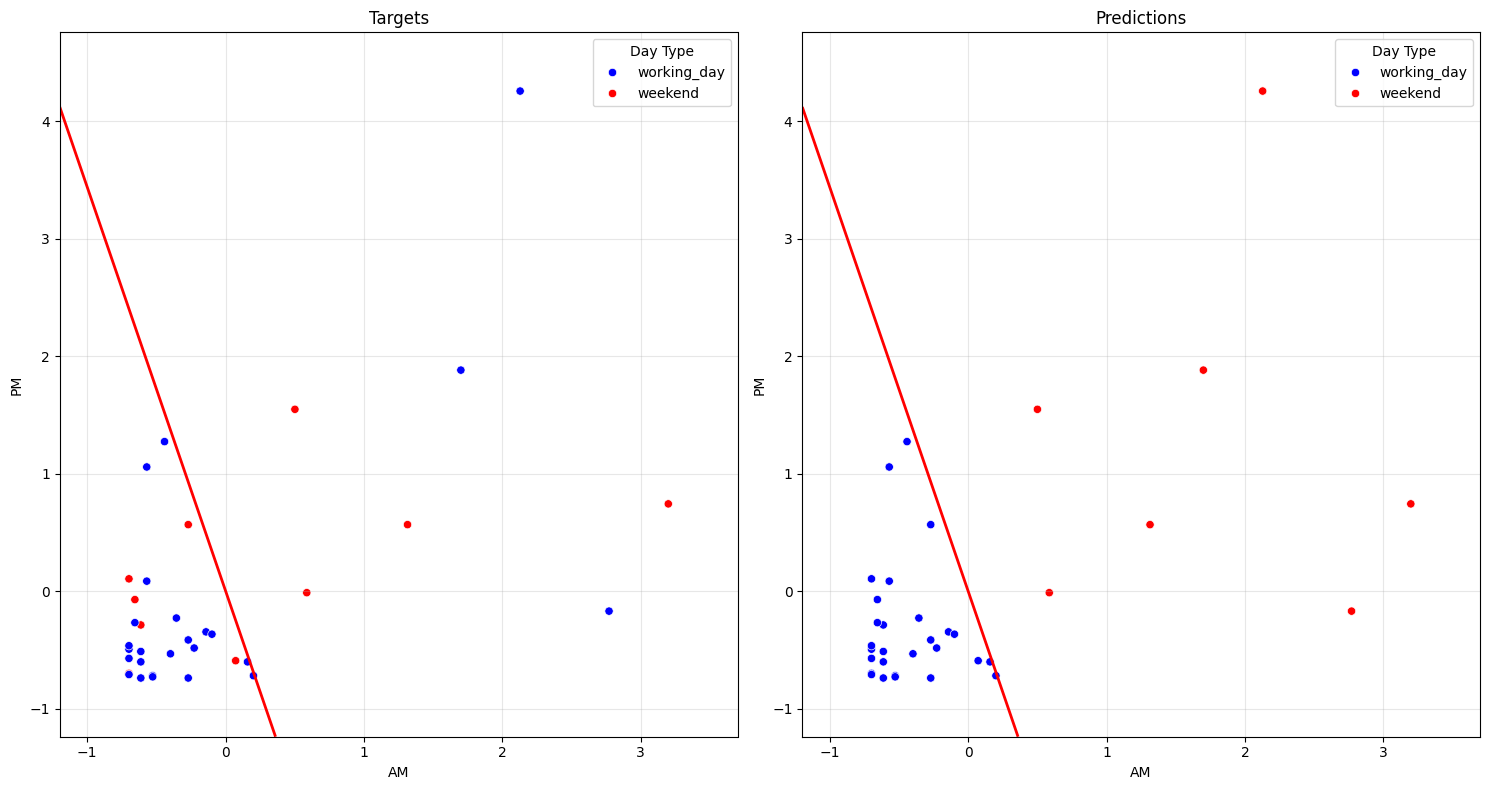

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax1)
ax1.set_xlabel('AM')
ax1.set_ylabel('PM')
ax1.set_title('Targets')
ax1.legend(title='Day Type')
ax1.grid(True, alpha=0.3)

ax2.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax2)
ax2.set_xlabel('AM')
ax2.set_ylabel('PM')
ax2.set_title('Predictions')
ax2.legend(title='Day Type')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [12]:
svc_clf = SVC(probability=True, random_state=21)
svc_clf.fit(X_scaled, y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
y_pred_svc = svc_clf.predict(X_scaled)
accuracy_svc = accuracy_score(y, y_pred_svc)
accuracy_svc

0.7428571428571429

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = ''

for kernel in kernels:
    svc_temp = SVC(kernel=kernel, probability=True, random_state=21)
    svc_temp.fit(X_scaled, y)
    y_pred_temp = svc_temp.predict(X_scaled)
    accuracy_temp = accuracy_score(y, y_pred_temp)
    
    print(f"accuracy SVC (kernel='{kernel}'): {accuracy_temp}")
    
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_kernel = kernel
best_kernel

accuracy SVC (kernel='linear'): 0.7142857142857143
accuracy SVC (kernel='poly'): 0.7428571428571429
accuracy SVC (kernel='rbf'): 0.7428571428571429
accuracy SVC (kernel='sigmoid'): 0.6857142857142857


'poly'

In [15]:
am_min, am_max = X_scaled[:, 0].min(), X_scaled[:, 0].max()
pm_min, pm_max = X_scaled[:, 1].min(), X_scaled[:, 1].max()

am_values = np.linspace(am_min - 0.5, am_max + 0.5, 100)
pm_values = np.linspace(pm_min - 0.5, pm_max + 0.5, 100)
xx, yy = np.meshgrid(am_values, pm_values)
grid = np.c_[xx.ravel(), yy.ravel()]

probs = svc_clf.predict_proba(grid)
probs_weekend = probs[:, 0]
probs_weekend = probs_weekend.reshape(xx.shape)

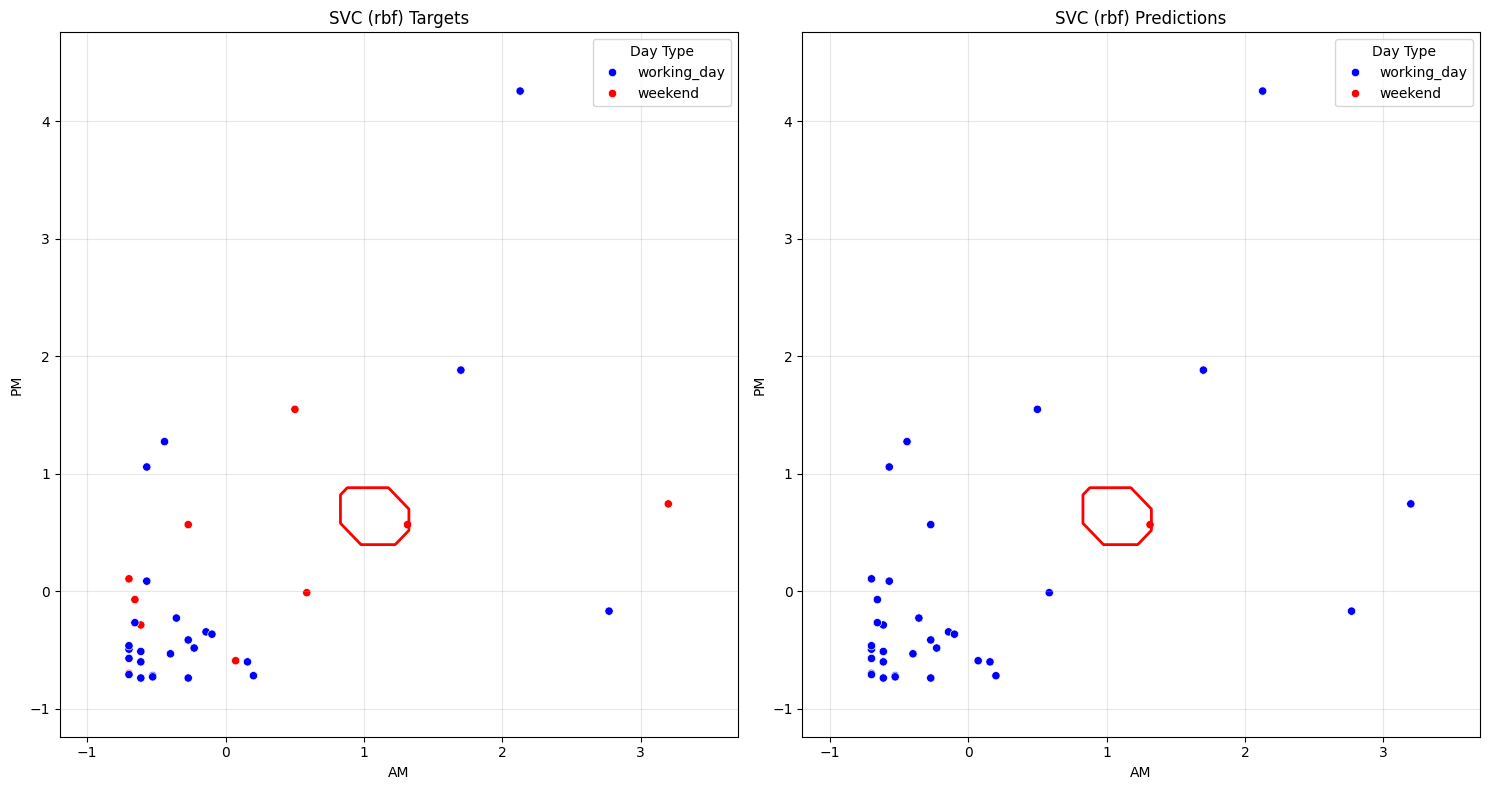

In [16]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax1)
ax1.set_xlabel('AM')
ax1.set_ylabel('PM')
ax1.set_title('SVC (rbf) Targets')
ax1.legend(title='Day Type')
ax1.grid(True, alpha=0.3)

ax2.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred_svc,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax2)
ax2.set_xlabel('AM')
ax2.set_ylabel('PM')
ax2.set_title('SVC (rbf) Predictions')
ax2.legend(title='Day Type')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [17]:
dectr_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dectr_clf.fit(X_scaled, y)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred_dectr = dectr_clf.predict(X_scaled)
accuracy_dt4 = accuracy_score(y, y_pred_dectr)
accuracy_dt4

0.9428571428571428

In [19]:
max_depths = [2, 3, 4, 5, 6]
best_accuracy = 0
best_depth = 0

for depth in max_depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_scaled, y)
    y_pred_temp = dt_temp.predict(X_scaled)
    accuracy_temp = accuracy_score(y, y_pred_temp)
    
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_depth = depth
best_depth

6

In [20]:
am_min, am_max = X_scaled[:, 0].min(), X_scaled[:, 0].max()
pm_min, pm_max = X_scaled[:, 1].min(), X_scaled[:, 1].max()

am_values = np.linspace(am_min - 0.5, am_max + 0.5, 100)
pm_values = np.linspace(pm_min - 0.5, pm_max + 0.5, 100)
xx, yy = np.meshgrid(am_values, pm_values)
grid = np.c_[xx.ravel(), yy.ravel()]

probs = dectr_clf.predict_proba(grid)
probs_weekend = probs[:, 0]
probs_weekend = probs_weekend.reshape(xx.shape)

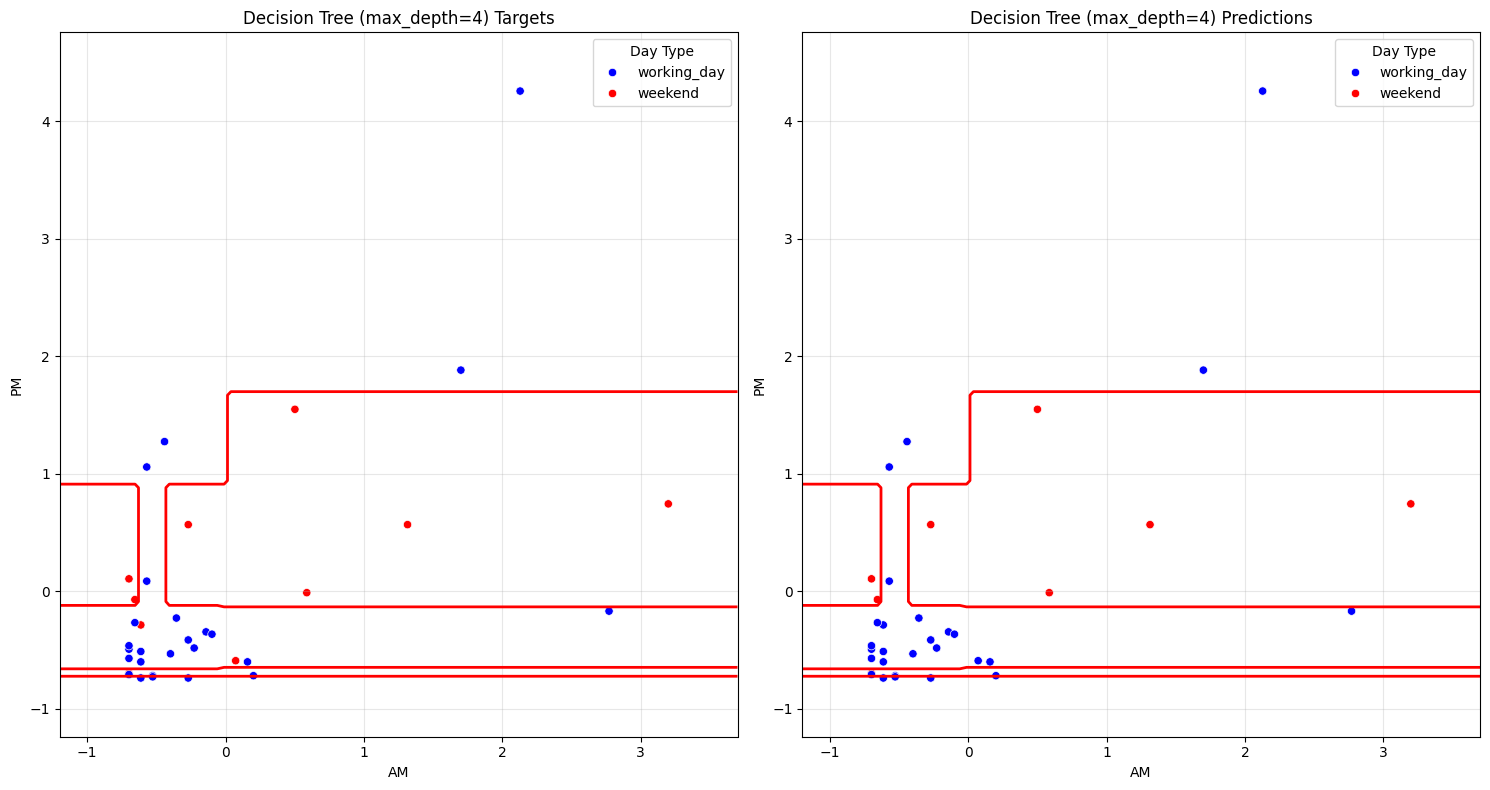

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax1)
ax1.set_xlabel('AM')
ax1.set_ylabel('PM')
ax1.set_title('Decision Tree (max_depth=4) Targets')
ax1.legend(title='Day Type')
ax1.grid(True, alpha=0.3)

ax2.contour(xx, yy, probs_weekend, levels=[0.5], colors='red', linewidths=2)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred_dectr,
                palette={'working_day': 'blue', 'weekend': 'red'}, ax=ax2)
ax2.set_xlabel('AM')
ax2.set_ylabel('PM')
ax2.set_title('Decision Tree (max_depth=4) Predictions')
ax2.legend(title='Day Type')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

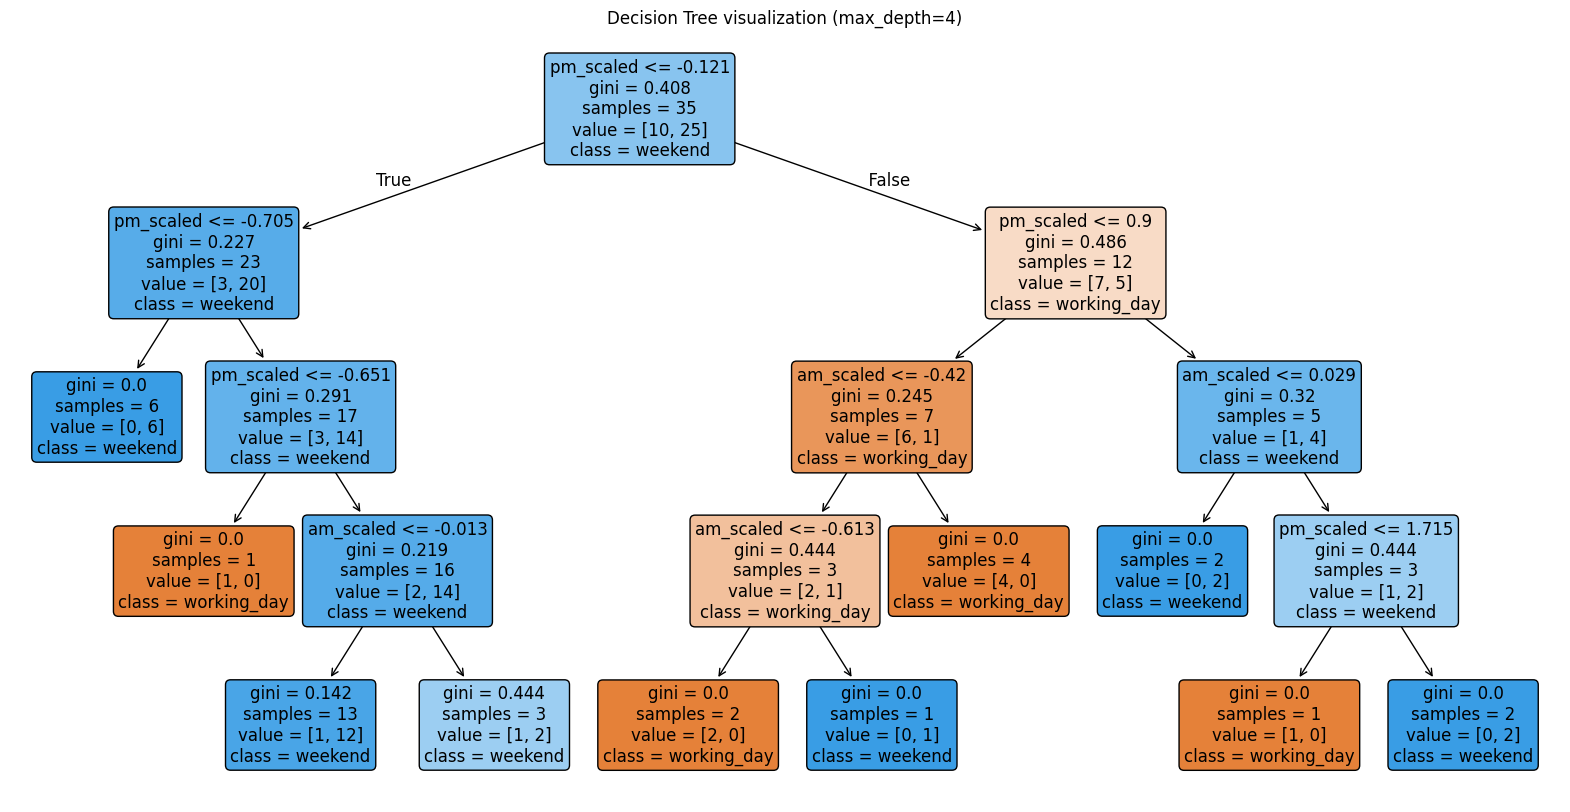

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(dectr_clf, 
          feature_names=['am_scaled', 'pm_scaled'],
          class_names=['working_day', 'weekend'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Decision Tree visualization (max_depth=4)')
plt.show()

How many leaves in the visualized tree label days as working days?

4